## Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading DataSets

In [3]:
df_movie_titles = pd.read_csv('./Acmegrade Data Science Nov_22 Files/movies (7).csv')

In [4]:
df_movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_movie_ratings = pd.read_csv('./Acmegrade Data Science Nov_22 Files/ratings (7).csv')

In [6]:
df_movie_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Data Preprocessing

In [7]:
df_movie_titles_1 = df_movie_titles.drop(['genres'], axis = 1)

In [8]:
df_movie_titles_1.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
df_movie_ratings_1 = df_movie_ratings.drop(['timestamp'], axis = 1)

In [10]:
df_movie_ratings_1.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [11]:
print(df_movie_ratings.shape)

print(df_movie_titles.shape)

(100836, 4)
(9742, 3)


In [12]:
print(df_movie_ratings_1.shape)

print(df_movie_titles_1.shape)

(100836, 3)
(9742, 2)


In [13]:
# merging the df_movie_ratings_1 and df_movie_titles_1

df = df_movie_titles_1.merge(df_movie_ratings_1)

In [14]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [15]:
df.groupby('title').describe().T

title          '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
movieId count         1.0                                      1.0   
        mean     117867.0                                  97757.0   
        std           NaN                                      NaN   
        min      117867.0                                  97757.0   
        25%      117867.0                                  97757.0   
        50%      117867.0                                  97757.0   
        75%      117867.0                                  97757.0   
        max      117867.0                                  97757.0   
userId  count         1.0                                      1.0   
        mean        610.0                                    332.0   
        std           NaN                                      NaN   
        min         610.0                                    332.0   
        25%         610.0                                    332.0   
        50%         610.0                                    332.0   
        75%         610.0                                    332.0   
        max         610.0                                    332.0   
rating  count         1.0                                      1.0   
        mean          4.0                                      4.0   
        std           NaN                                      NaN   
        min           4.0                                      4.0   
        25%           4.0                                      4.0   
        50%           4.0                                      4.0   
        75%           4.0                                      4.0   
        max           4.0                                      4.0   

title          'Round Midnight (1986)  'Salem's Lot (2004)  \
movieId count                2.000000                  1.0   
        mean             26564.000000              27751.0   
        std                  0.000000                  NaN   
        min              26564.000000              27751.0   
        25%              26564.000000              27751.0   
        50%              26564.000000              27751.0   
        75%              26564.000000              27751.0   
        max              26564.000000              27751.0   
userId  count                2.000000                  1.0   
        mean               354.500000                345.0   
        std                 31.819805                  NaN   
        min                332.000000                345.0   
        25%                343.250000                345.0   
        50%                354.500000                345.0   
        75%                365.750000                345.0   
        max                377.000000                345.0   
rating  count                2.000000                  1.0   
        mean                 3.500000                  5.0   
        std                  0.000000                  NaN   
        min                  3.500000                  5.0   
        25%                  3.500000                  5.0   
        50%                  3.500000                  5.0   
        75%                  3.500000                  5.0   
        max                  3.500000                  5.0   

title          'Til There Was You (1997)  'Tis the Season for Love (2015)  \
movieId count                   2.000000                              1.0   
        mean                  779.000000                         149380.0   
        std                     0.000000                              NaN   
        min                   779.000000                         149380.0   
        25%                   779.000000                         149380.0   
        50%                   779.000000                         149380.0   
        75%                   779.000000                         149380.0   
        max                   779.000000                         149380.0   
userI

Getting the mean(average) rating of all the movies according to the title

In [16]:
mean_ratings = df.groupby('title')['rating'].mean().sort_values()

In [17]:
mean_ratings

title
Rust and Bone (De rouille et d'os) (2012)        0.5
The Emoji Movie (2017)                           0.5
The Butterfly Effect 3: Revelations (2009)       0.5
Follow Me, Boys! (1966)                          0.5
The Beast of Hollow Mountain (1956)              0.5
                                                ... 
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre II (1990)                5.0
My Love (2006)                                   5.0
Winter in Prostokvashino (1984)                  5.0
Karlson Returns (1970)                           5.0
Name: rating, Length: 9719, dtype: float64

_____

Here there could be some movies that could have higher ratings but revied by few users only.

So, only 'rating' wouldn't be a great criteria to judge the movie 

We also have to consider the number of times the movie has been watched.

In [18]:
df.groupby('title')['rating'].count().sort_values()

title
'71 (2014)                                                                          1
Latter Days (2003)                                                                  1
Late Shift, The (1996)                                                              1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Night Shopping (2001)                                                          1
                                                                                 ... 
Matrix, The (1999)                                                                278
Silence of the Lambs, The (1991)                                                  279
Pulp Fiction (1994)                                                               307
Shawshank Redemption, The (1994)                                                  317
Forrest Gump (1994)                                                               329
Name: rating, Length: 9719, dtype: int64

In [19]:
df_1 = pd.DataFrame(columns = ['mean_rating','rating_count'])

df_1['mean_rating'] = df.groupby('title')['rating'].mean()

df_1['rating_count'] = df.groupby('title')['rating'].count()

In [20]:
df_1

,mean_rating,rating_count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [21]:
df_1.sort_values('rating_count', ascending=False)

,mean_rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
King Solomon's Mines (1950),3.000000,1
King Solomon's Mines (1937),2.500000,1
King Ralph (1991),1.500000,1


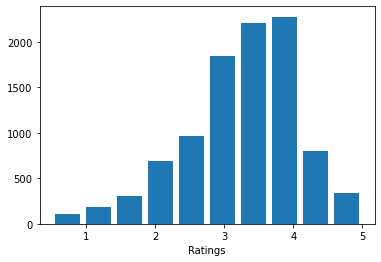

In [22]:
plt.hist(df_1['mean_rating'], rwidth=0.8)

plt.xlabel('Ratings')

plt.show()

The above graph shows that the average rating of the movies lies between 3 and 4

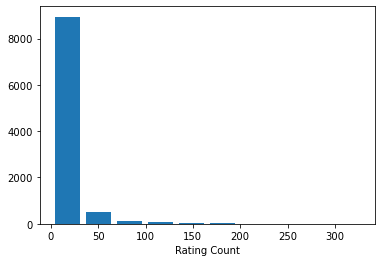

In [29]:
plt.hist(df_1['rating_count'], rwidth=0.8)

plt.xlabel('Rating Count')

plt.show()

The rating count of very few movies is more than 50

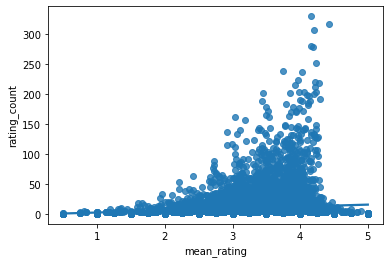

In [41]:
sns.regplot(x = 'mean_rating', y = 'rating_count', data=df_1)
plt.show()

## Item Based Collabrative Filtering

In [42]:
user_movie_rating_matrix = df.pivot_table(index='userId', columns='title', values='rating')

In [43]:
user_movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [44]:
user_movie_rating_matrix.shape

(610, 9719)

Finding the recommendation of a single movie : We have to filter that movie column that contains ratings 

In [126]:
# for movie 'Round Midnight (1986)

pulp_fiction_ratings = user_movie_rating_matrix["Pulp Fiction (1994)"]

pulp_fiction_ratings

userId
1      3.0
2      NaN
3      NaN
4      1.0
5      5.0
      ... 
606    5.0
607    3.0
608    5.0
609    4.0
610    5.0
Name: Pulp Fiction (1994), Length: 610, dtype: float64

Here we can see that there are 307 users that have rated this movie

Now we have to find the correlation between user ratings for a particular movie and other movies

In [127]:
pulp_fiction_ratings_corr = pd.DataFrame(user_movie_rating_matrix.corrwith(pulp_fiction_ratings), columns=['pulp_fiction_corr'])

C:\Users\prath\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\prath\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [128]:
pulp_fiction_ratings_corr.sort_values('pulp_fiction_corr',ascending=False)

,pulp_fiction_corr
title,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0
Azumi (2003),1.0
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0
"War Zone, The (1999)",1.0
"Wolfman, The (2010)",1.0
...,...
Zulu (2013),NaN
[REC]² (2009),NaN
[REC]³ 3 Génesis (2012),NaN


Correlation might not be enough for recommending the movie for that we consider another parameter that is rating count

Here we have to remove the NaN values as they are the values that hasn't be rated by the users

In [119]:
pulp_fiction_ratings_corr = pulp_fiction_ratings_corr.join(df_1['rating_count'])

In [120]:
pulp_fiction_ratings_corr.sort_values('pulp_fiction_corr',ascending=False)

,pulp_fiction_corr,rating_count
title,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2
Azumi (2003),1.0,2
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2
"War Zone, The (1999)",1.0,2
"Wolfman, The (2010)",1.0,2
...,...,...
Zulu (2013),NaN,1
[REC]² (2009),NaN,3
[REC]³ 3 Génesis (2012),NaN,2


In [121]:
pulp_fiction_ratings_corr.dropna().sort_values('pulp_fiction_corr', ascending=False)

,pulp_fiction_corr,rating_count
title,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2
Azumi (2003),1.0,2
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2
"War Zone, The (1999)",1.0,2
"Wolfman, The (2010)",1.0,2
...,...,...
White Heat (1949),-1.0,3
Ride Along (2014),-1.0,6
Promises (2001),-1.0,2


In [122]:
pulp_fiction_ratings_corr_50 = pulp_fiction_ratings_corr[pulp_fiction_ratings_corr['rating_count'] > 50]

In [123]:
pulp_fiction_ratings_corr_50.sort_values('pulp_fiction_corr', ascending=False)

,pulp_fiction_corr,rating_count
title,,
Pulp Fiction (1994),1.000000,307
"Wolf of Wall Street, The (2013)",0.579915,54
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73
...,...,...
City Slickers II: The Legend of Curly's Gold (1994),-0.346948,55
Broken Arrow (1996),-0.352941,84
Pocahontas (1995),-0.366726,68


Now consider all the movies

In [89]:
all_movie_corr = user_movie_rating_matrix.corr(method='pearson', min_periods=50)

all_movie_corr

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## User Interaction

In [144]:
# user movie
um = input('Enter the movie name : ')

Enter the movie name : Shawshank Redemption, The (1994)


In [ ]:
# getting the user ratings from the user_rating_matrix
um_ratings = user_movie_rating_matrix[um]

# getting the correlation of the movie entered by user
um_ratings_corr = pd.DataFrame(user_movie_rating_matrix.corrwith(um_ratings), columns=['um_corr'])

# appending the rating count 
um_ratings_corr = um_ratings_corr.join(df_1['rating_count'])

# dropping the null values
um_ratings_corr.dropna().sort_values('um_corr', ascending=False)

um_ratings_corr.sort_values('um_corr', ascending=False)

In [146]:
um_ratings_corr_avg = um_ratings_corr[um_ratings_corr['rating_count'] > um_ratings_corr['rating_count'].mean()]

In [147]:
# top 5 recommended movies to watch 

um_ratings_corr_avg.sort_values('um_corr', ascending=False).head()

,um_corr,rating_count
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Star Wars: The Last Jedi (2017),0.930106,12
Innerspace (1987),0.901504,12
"Substitute, The (1996)",0.875000,11
Meet the Robinsons (2007),0.870370,11
